In [3]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1)
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:,1], 'label': y})
df["label"] = df["label"].astype(int)


In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'label': y})
df["label"] = df["label"].astype(int)
df

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2
...,...,...,...
495,-7.438972,8.248157,3
496,-2.586299,9.355438,0
497,-7.215412,-5.211088,2
498,-7.402350,-5.831100,2


Text(0.5, 1.0, 'Original Data')

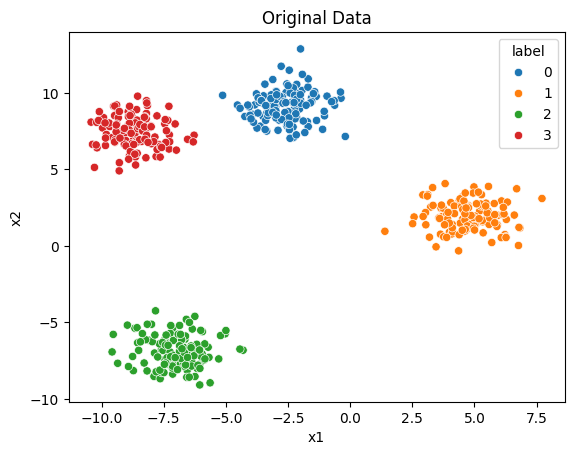

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original Data")

In [ ]:
X = df.drop("label", axis="columns")
X

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185
...,...,...
495,-7.438972,8.248157
496,-2.586299,9.355438
497,-7.215412,-5.211088
498,-7.402350,-5.831100


<Axes: >

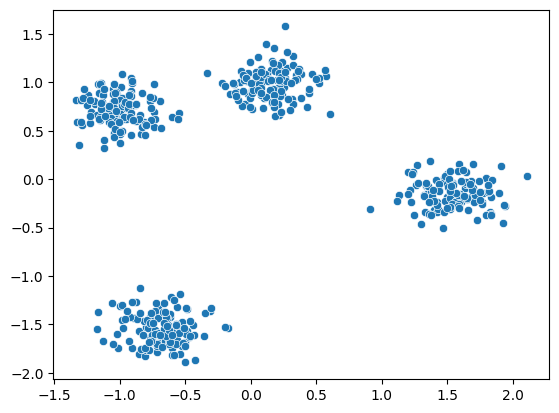

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:,1])


In [ ]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k, n_init='auto').fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances

[999.9999999999999,
 522.1570539287742,
 116.09567852755528,
 28.786938978874026,
 25.654047049774466,
 23.236965615704392,
 21.437173072986784,
 19.452971263833305,
 16.629179685426852]

Text(0.5, 1.0, 'Elbow/Knee plot')

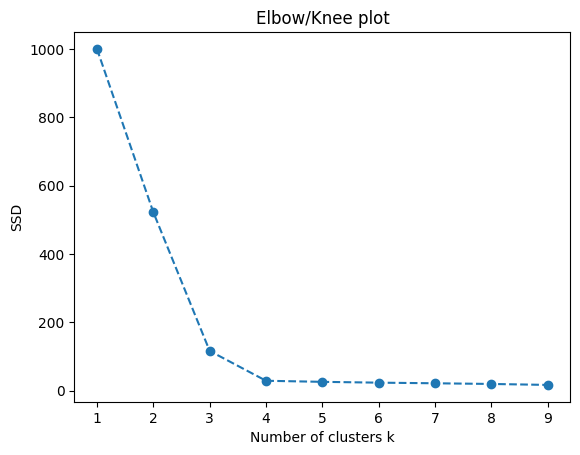

In [19]:
plt.plot(clusters, sum_squared_distances, "--o")
plt.xlabel("Number of clusters k")
plt.ylabel("SSD")
plt.title("Elbow/Knee plot")

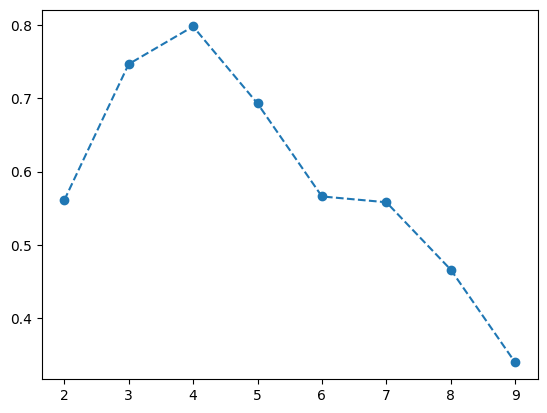

In [33]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init='auto').fit(scaled_X) for k in clusters]
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "--o")

## K-Means

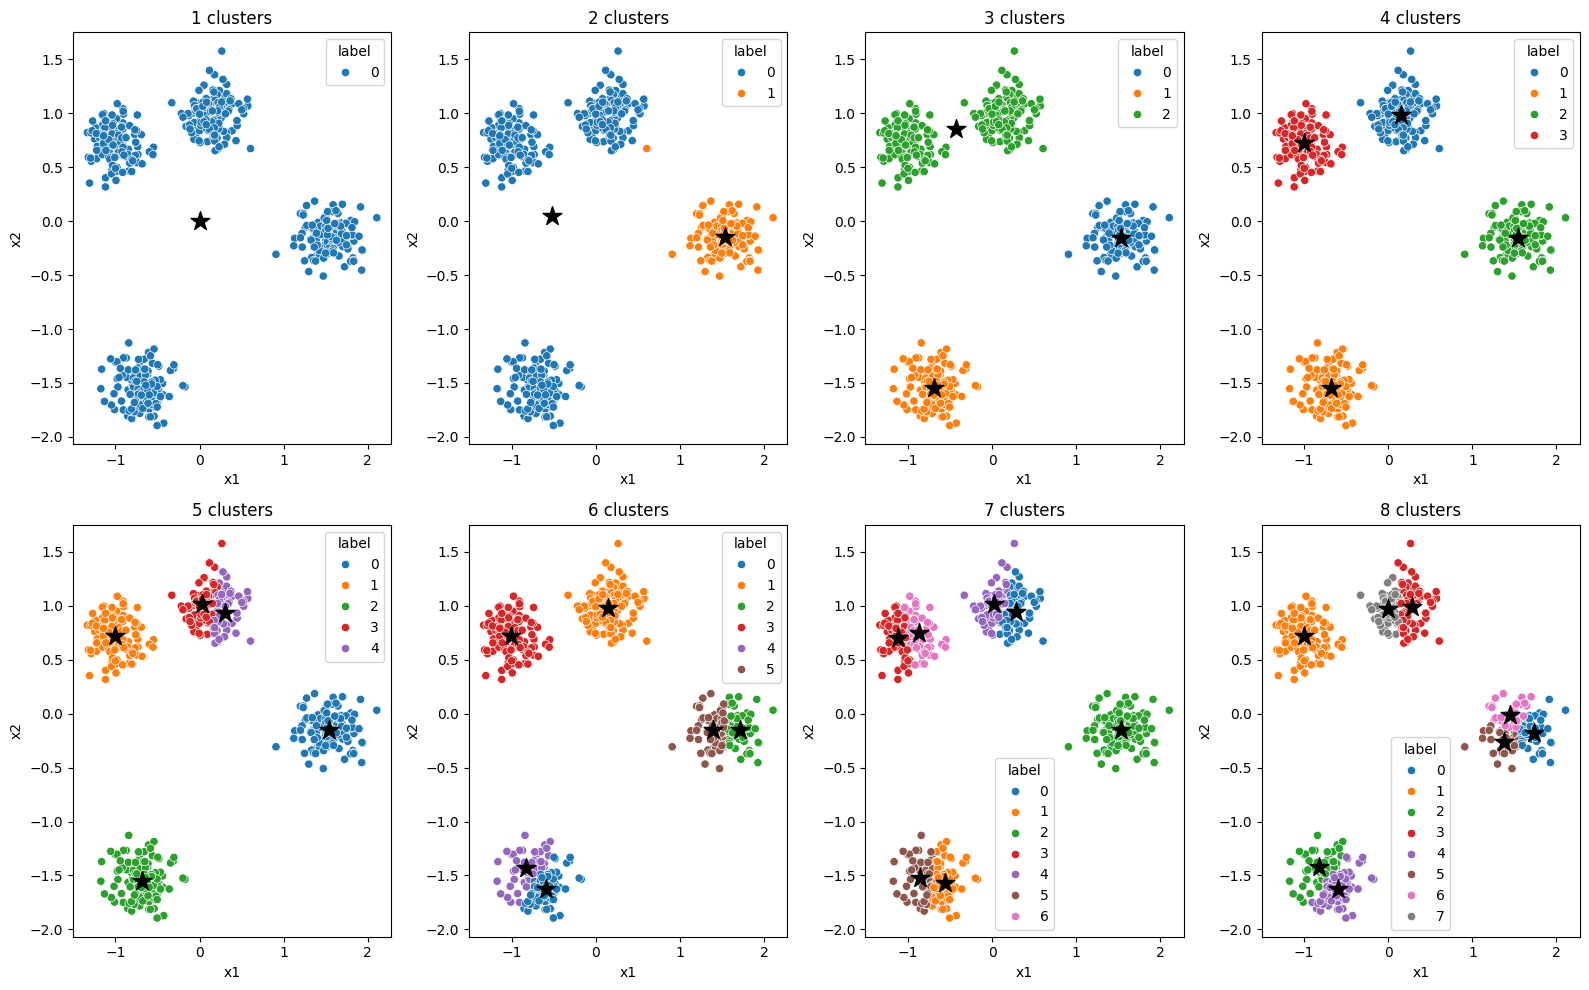

In [24]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", palette="tab10", ax=ax)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker="*", color="black")
    ax.set_title(f"{i+1} clusters")

plt.tight_layout()
plt.show()


In [27]:
kmeans[1].cluster_centers_

array([[-0.51597617,  0.04934184],
       [ 1.53154831, -0.1464591 ]])